<center><img src="Logolink_OP_VVV_hor_barva_cz.jpg" width="600px"/></center>

#### <center>ESF projekt Západočeské univerzity v Plzni reg. č. CZ.02.2.69/0.0/0.0/16 015/0002287</center>


# USVP  1

## Python 3.X instalation 

### Windows

PythonXY https://code.google.com/p/pythonxy/

WinPython http://winpython.github.io/

Anaconda https://store.continuum.io/cshop/anaconda/

### Linux

Two versions of Python (2.7 and 3.6) are usually installed in the Linux distribution .

## IDE

PyCharm https://www.jetbrains.com/pycharm/

Visual Studio Code https://code.visualstudio.com/

případně další https://wiki.python.org/moin/IntegratedDevelopmentEnvironments

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Python basics

In [2]:
print("Hello World")

Hello World


In [3]:
import numpy as np 
nums = [0, 1, 6, 3, 4, 5] # List
print("List nums:")
print(nums) # Print List
nums[2] # Access to the third item of the List
nums[1:3] # Access to the second and third item of the list
nums[::-1] # Reversed list
matrix = np.ones([10,10], dtype=np.uint8) # Numpy matrix 10x10 contains ones in all cells
matrix_zero = np.zeros([10,10], dtype=np.uint8) # Numpy matrix 10x10 contains zeros in all cells
matrix[1:3,3:6] = 2 # Set cells value in the part of the matrix to the value 2
print("Matrix part")
print(matrix[0:5,2:6]) # print whole matrix
array = matrix.ravel() # transorm matrix into 1D array

List nums:
[0, 1, 6, 3, 4, 5]
Matrix part
[[1 1 1 1]
 [1 2 2 2]
 [1 2 2 2]
 [1 1 1 1]
 [1 1 1 1]]


## Image Processing

In [4]:
import skimage
import skimage.data
import matplotlib.pyplot as plt

/home/neduchal/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper
/home/neduchal/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:293: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  plugin_module = __import__('skimage.io._plugins.' + modname,


[[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]


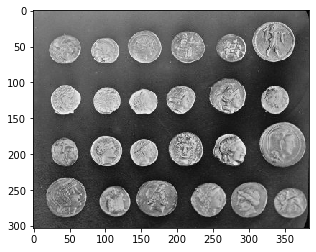

In [5]:
# Load image coins from skimage.data
img = skimage.data.coins()
print(img)
# Matplotlib show image like matrix (numpy ndimage)
plt.imshow(img, cmap="gray") # colormap grayscale
#plt.imshow(img) # colormap grayscale
plt.show() # nothing showed without this line

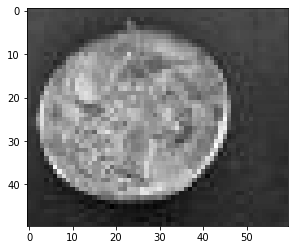

In [6]:
# Show part of the image
plt.imshow(img[30:80, 20:80], cmap="gray")
plt.show()

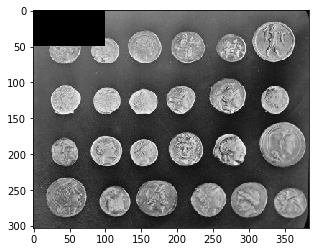

In [7]:
# Change brightness of color in top left corner to black (value = 0)
img2 = img.copy()

img2[0:50, 0:100] = 0  # img[row_start:row_stop+1, column_start:column_stop+1] = 0

plt.imshow(img2, cmap="gray")
plt.show()

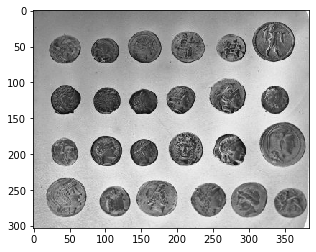

In [8]:
# Negative image. 

# MAX value of the 8 bit range (255) minus img values.
# FOR RGB image it should be done for every channel.
img3 = 255 - img

plt.imshow(img3, cmap="gray")
plt.show()

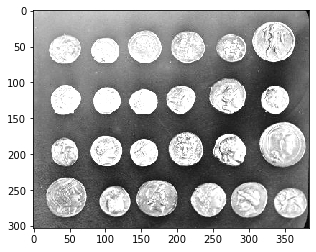

In [9]:
# Change of the image contrast. Be sure to check min and max value of the 8 bit range.
img4 = img * 1.5

img4[img4 > 255] = 255
img4[img4 < 0] = 0

plt.imshow(img4, cmap="gray")
plt.show()

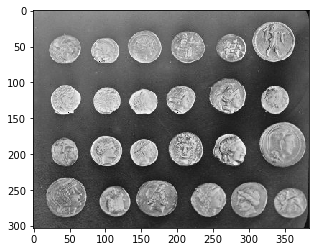

In [10]:
# Change of the image brightness. Be sure to check min and max value of the 8 bit range.
img5 = img + 10

img5[img5 > 255] = 255
img5[img5 < 0] = 0

plt.imshow(img5, cmap="gray")
plt.show()

## Histograms

### Absolute histogram

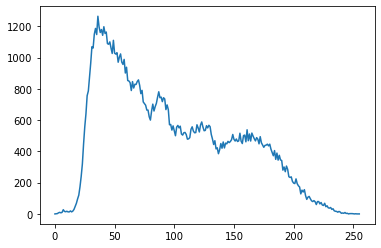

In [11]:
# Function computing histogram of the image (fixed for 256 bins)
def histogram(image):
    hist = np.zeros(256, dtype=int)
    for i in image.ravel():
        hist[i] += 1
    return hist

h = histogram(img)
# Show histogram
plt.plot(h)
plt.show()


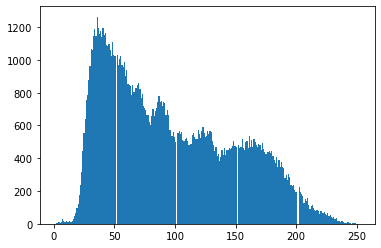

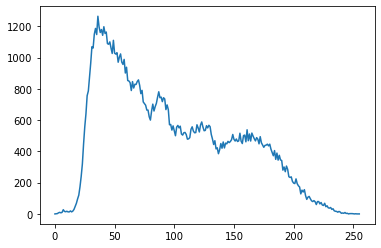

In [12]:
# compute histogram using matplotlib
h2 = plt.hist(img.ravel(), bins=256)
# compute histogram using numpy
h3, _ = np.histogram(img.ravel(), 256, (0, 255))
plt.figure() # Plot to a new figure
plt.plot(h3)
plt.show()

### Relative histogram

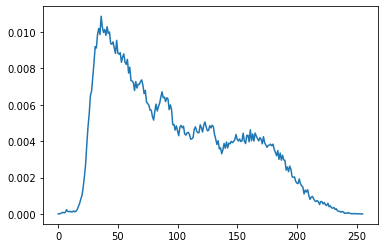

In [13]:
# Compute relative histogram
plt.plot(h/(img.shape[0]*img.shape[1]))
plt.show()

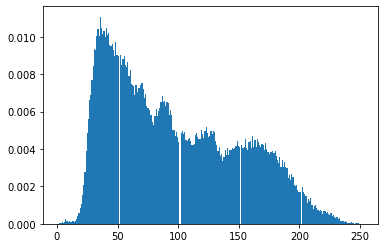

In [14]:
# Compute relative histogram using matplotlib
r2 = plt.hist(img.ravel(),density=True, bins=256)

### Cumulative histogram

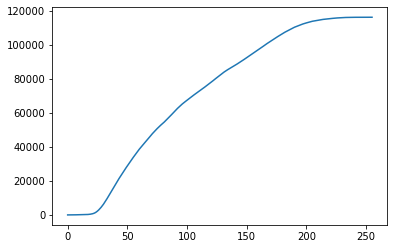

In [15]:
# Compute cumulative histogram
def cumulative(hist):
    chist = hist.copy()
    for i in range(1, len(chist)):
        chist[i] += chist[i-1] 
    return chist

c = cumulative(h)

plt.plot(c)
plt.show()

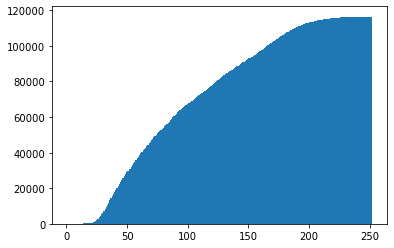

In [16]:
# compute cumulative histogram using matplotlib
h2 = plt.hist(img.ravel(),cumulative=True, bins=256)